In [1]:
"""
Local setup - Mac Mini M4 Apple Silicon
You may need to get the right version of CPU optimized SpaCy for your system, if you are running this in a non-GPU based PC.
"""

"""

import os
os.environ["PYTHONWARNINGS"] = "ignore"

import warnings
warnings.filterwarnings("ignore")

%pip install -U pip setuptools wheel

%pip install -r requirements.txt --force-reinstall --no-cache-dir


!python3 -m spacy download en_core_web_sm

"""




'\n\nimport os\nos.environ["PYTHONWARNINGS"] = "ignore"\n\nimport warnings\nwarnings.filterwarnings("ignore")\n\n%pip install -U pip setuptools wheel\n\n%pip install -r requirements.txt --force-reinstall --no-cache-dir\n\n\n!python3 -m spacy download en_core_web_sm\n\n'

In [2]:
import sys
import subprocess

# 1. Force Uninstall NumPy (The root cause)
# We run this loop to peel back any layers (sometimes installed in multiple spots)
print("--- Cleaning NumPy ---")
subprocess.run([sys.executable, "-m", "pip", "uninstall", "-y", "numpy"])
subprocess.run([sys.executable, "-m", "pip", "uninstall", "-y", "numpy"])

# 2. The Atomic Install (One command, all constraints)
# We pin EVERYTHING to specific versions that are guaranteed to play nice.
print("\n--- Installing Golden Combination ---")
packages = [
    # The Kingpin: Strictly force NumPy 1.26.4
    "numpy==1.26.4",
    
    # Core Libs: Pin to versions from ~Jan 2024 (Safe with TF 2.15)
    "pandas==2.1.4",       # Newer pandas might force NumPy 2.0
    "scikit-learn==1.3.2", # Newer sklearn might force NumPy 2.0
    "matplotlib==3.8.2",
    "tqdm",
    "wordcloud",
    
    # Apple Silicon TF
    "tensorflow-macos==2.15.0",
    "tensorflow-metal==1.1.0",
    "protobuf==4.23.4"     # Pin this to prevent random version drift
]

# Run it as one single atomic command so pip resolves them together
subprocess.check_call(
    [sys.executable, "-m", "pip", "install"] + packages + ["--no-cache-dir"]
)

print("\n--- SUCCESS! Restart Kernel Now ---")

--- Cleaning NumPy ---
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2



--- Installing Golden Combination ---
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 44.3 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 47.8 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 50.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 42.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 38.3 MB/s  0:00:05 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 41.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 68.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 35.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 33.1 MB/s  0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 2.0.1
    Uninstalling wrapt-2.0.1:
      Successfully uninstalled wrapt-2.0.1
  Attempting uninstall: protobu

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.20.0 requires keras>=3.10.0, but you have keras 2.15.0 which is incompatible.
tensorflow 2.20.0 requires ml_dtypes<1.0.0,>=0.5.1, but you have ml-dtypes 0.2.0 which is incompatible.
tensorflow 2.20.0 requires protobuf>=5.28.0, but you have protobuf 4.23.4 which is incompatible.
tensorflow 2.20.0 requires tensorboard~=2.20.0, but you have tensorboard 2.15.2 which is incompatible.
thinc-apple-ops 1.0.0 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [3]:

import os
os.environ["PYTHONWARNINGS"] = "ignore"


import warnings
import urllib3.exceptions
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore", urllib3.exceptions.NotOpenSSLWarning)

import random

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

import re
import spacy

from collections import Counter

from tqdm import tqdm
from tqdm.keras import TqdmCallback

tqdm.pandas()

from dataclasses import dataclass

from typing import Any


/Users/ramsundar/Documents/IITM-Graded-Projects/Week 31/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
@dataclass
class Config:
    DATA_PATH: str = "twitter_training.csv"
    RANDOM_SEED: int = 28
    SPACY_MODEL: str = "en_core_web_sm"
    TEXT_VECTOR_MAX_TOKENS:int = 5000
    TEXT_VECTOR_OUTPUT_MODE: str = "int"
    TEXT_VECTOR_OUTPUT_SEQUENCE_LENGTH:int =300
    TEXT_VECTOR_EMBEDDING_DIMENSION:int = 64
    VECTORIZER: Any = None



GlobalConfig = Config()



def set_global_seed(seed_value: int) -> None:
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    random.seed(seed_value)
    tf.random.set_seed(seed_value)
    np.random.seed(seed_value)    

set_global_seed(GlobalConfig.RANDOM_SEED)

# Part 1 - Data Processing

## 1.1 Loading the dataset & 1.2 Data Cleaning

In [10]:

def load_and_setup_data() -> pd.DataFrame:
    df = pd.read_csv(GlobalConfig.DATA_PATH)    
    # First column appers to be some sort file or sequence number and the second appears to be the source
    # Those two columns do not have any impact on sentiment analysis
    # Take the last two columns
    df = df.iloc[:, -2:]
    # Swap columns 1 and 2
    df = df[[df.columns[1], df.columns[0]]]
    # Setup column names
    df.columns = ["tweet", "sentiment"]
    # Remove empty rows
    df = df.dropna()
    # Remove where sentiment is "Irrelevant"
    df = df[df["sentiment"] != "Irrelevant"]
    # Remove diuplicate rows
    df = df.drop_duplicates()
    # Look for tweets where the same tweet is classified as a different sentiment
    # Take the first occurence - this will get us clean data and will not mislead the classifier later during training
    df = df.drop_duplicates(subset=["tweet"], keep="first")
    return df

df = load_and_setup_data()


# Just keep the essentials, remove named entities, parsing and sentence segmentation for speed
nlp = spacy.load(GlobalConfig.SPACY_MODEL, disable=["ner", "parser", "senter"])


def clean_and_pre_process(texts: list[str]) -> list[str]:        
    url_pattern = re.compile(r"http\S+|www\S+|https\S+")
    twitter_handle_pattern = re.compile(r"\@\w+|\#")
    non_alpha_pattern = re.compile(r"[^a-zA-Z\s]")

    cleaned_texts: list[str] = []
    for text in texts:
        text = url_pattern.sub("", text)
        text = twitter_handle_pattern.sub("", text)
        text = non_alpha_pattern.sub("", text)
        cleaned_texts.append(text.strip().lower())

    docs = nlp.pipe(cleaned_texts, batch_size=2000, n_process=-1)

    final_texts: list[str] = []
    for doc in tqdm(docs, total=len(cleaned_texts)):
        # This is a key line - we are lemmatizing, removing stop words, punctuation and single character tokens
        tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and len(token.lemma_) > 1]
        final_texts.append(" ".join(tokens))

    return final_texts
    
    
df["sanitized_tweet"] = clean_and_pre_process(df["tweet"].tolist())
df.head()

100%|██████████| 57296/57296 [00:17<00:00, 3223.01it/s]


,tweet,sentiment,sanitized_tweet
0,I am coming to the borders and I will kill you...,Positive,come border kill
1,im getting on borderlands and i will kill you ...,Positive,get borderland kill
2,im coming on borderlands and i will murder you...,Positive,come borderland murder
3,im getting on borderlands 2 and i will murder ...,Positive,get borderland murder
4,im getting into borderlands and i can murder y...,Positive,get borderland murder


## 1.3 Feature Engineering

In [11]:
def create_tokenized_words(df: pd.DataFrame) -> tuple[pd.DataFrame, Any]:
    texts = df["sanitized_tweet"].values
    vectorizer = tf.keras.layers.TextVectorization(
        max_tokens=GlobalConfig.TEXT_VECTOR_MAX_TOKENS, 
        output_mode=GlobalConfig.TEXT_VECTOR_OUTPUT_MODE, 
        output_sequence_length=GlobalConfig.TEXT_VECTOR_OUTPUT_SEQUENCE_LENGTH
    )   
    vectorizer.adapt(texts)
    # Convert text to integer sequences - which will then be fed into the embedding layer
    tfidf_vectors = vectorizer(texts)
    # add the tokenized words as a new column
    df["sanitized_tweet_vector"] = list(tfidf_vectors.numpy())
    return (df, vectorizer)

df, GlobalConfig.VECTORIZER = create_tokenized_words(df)
df.head()

,tweet,sentiment,sanitized_tweet,sanitized_tweet_vector
0,I am coming to the borders and I will kill you...,Positive,come border kill,"[30, 1503, 83, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,im getting on borderlands and i will kill you ...,Positive,get borderland kill,"[7, 49, 83, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
2,im coming on borderlands and i will murder you...,Positive,come borderland murder,"[30, 49, 1108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
3,im getting on borderlands 2 and i will murder ...,Positive,get borderland murder,"[7, 49, 1108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,im getting into borderlands and i can murder y...,Positive,get borderland murder,"[7, 49, 1108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


# Part 2 - Exploratory Data Analysis (EDA)

## 2.1 Basic Statistics

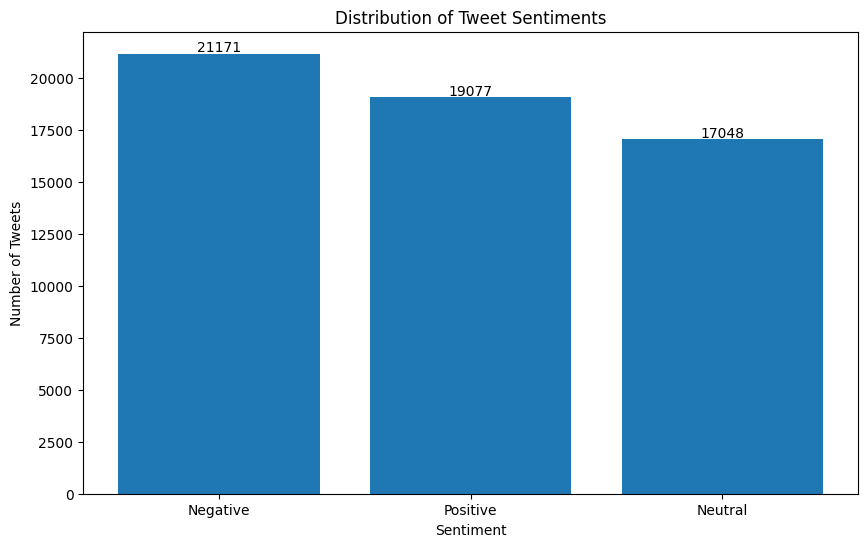

In [7]:
# Explore the distribution of tweet sentiments (e.g., how many positive, negative, and neutral tweets are there?).
# Plot a simple bar chart
sentiment_counts = df["sentiment"].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values.tolist())
# Add total counts on top of each bar
for i, count in enumerate(sentiment_counts.values):
    plt.text(i, count + 100, str(count), ha="center")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.title("Distribution of Tweet Sentiments")
plt.show()


## 2.2 Visualizations

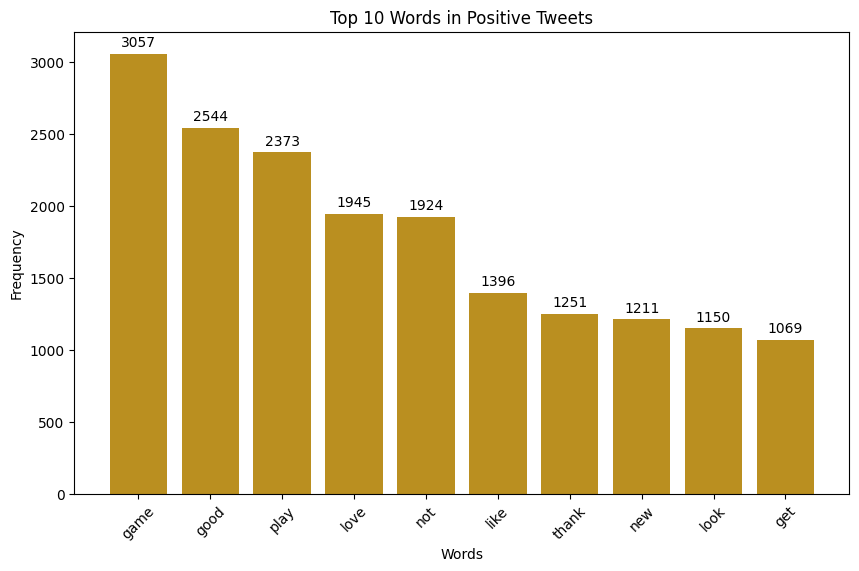

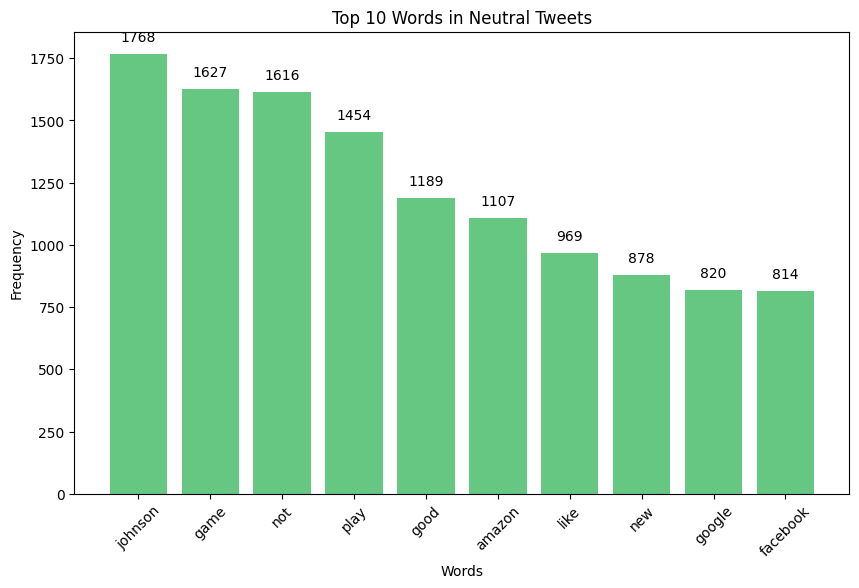

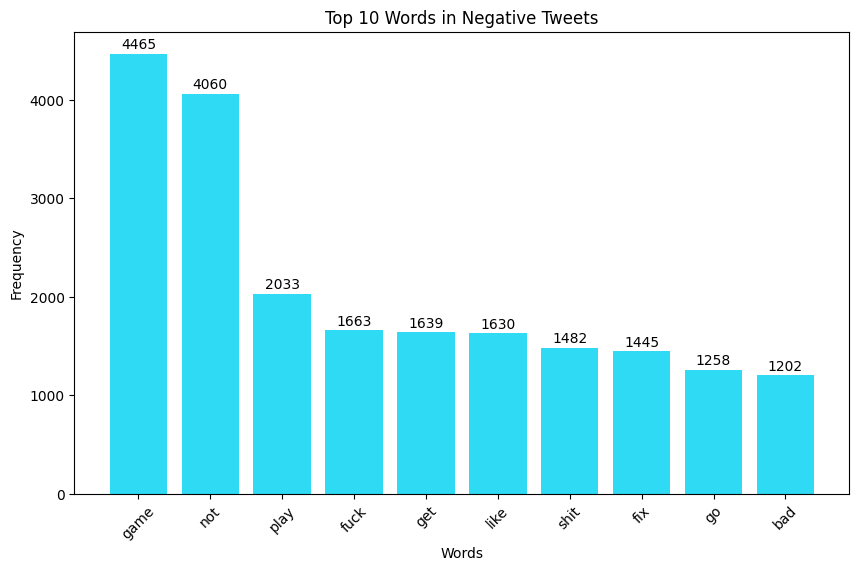

In [8]:
# Frequency of top words in Positive, Negative and Neutral tweets

sentiment_categories = df["sentiment"].unique()

def show_top_words(df: pd.DataFrame, sentiment_categories: list[str]) -> None:
    top_n = 10
    for sentiment in sentiment_categories:
        subset = df[df["sentiment"] == sentiment]
        all_words = " ".join(subset["sanitized_tweet"]).split()
        word_counts = Counter(all_words)
        most_common_words = word_counts.most_common(top_n)    
        words, counts = zip(*most_common_words)    
        plt.figure(figsize=(10, 6))
        plt.bar(words, counts, color = np.random.rand(3,))
        plt.xlabel("Words")
        plt.ylabel("Frequency")
        plt.title(f"Top {top_n} Words in {sentiment} Tweets")
        plt.xticks(rotation=45)
        for i, count in enumerate(counts):
            plt.text(i, count + 50, str(count), ha="center")
        plt.show()

show_top_words(df, sentiment_categories.tolist())

TypeError: asarray() got an unexpected keyword argument 'copy'

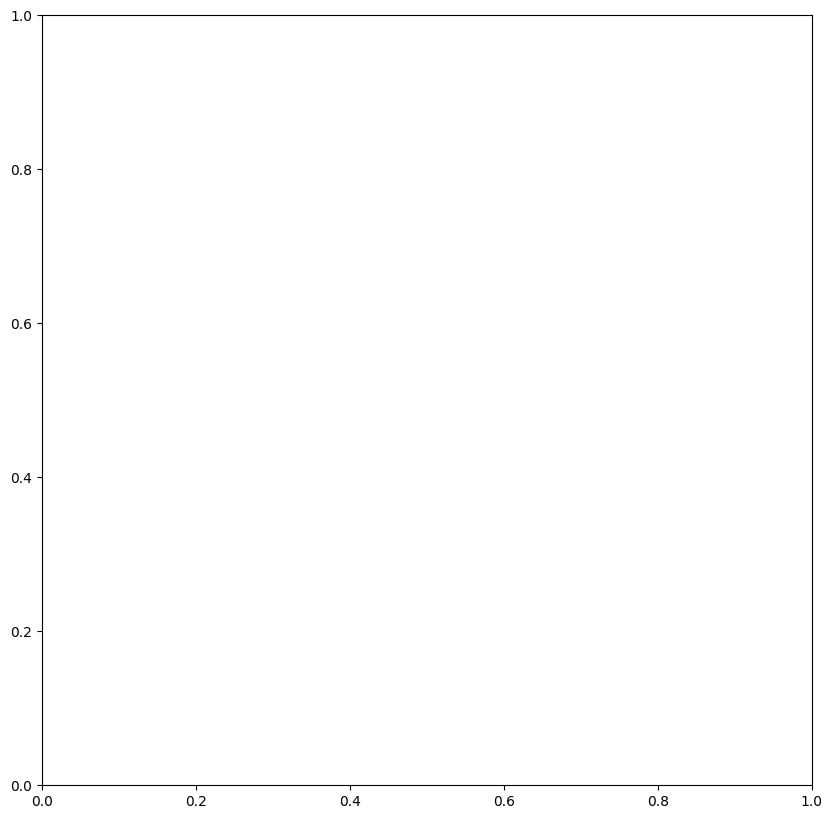

In [12]:

def create_wordcloud() -> None:
    # Wordcloud for positive and negative tweets
    for sentiment in ["Positive", "Negative"]:
        subset = df[df["sentiment"] == sentiment]
        all_words = " ".join(subset["sanitized_tweet"])
        wordcloud = WordCloud(width=1000, height=400, background_color="white").generate(all_words)
        plt.figure(figsize=(10, 10))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Word Cloud for {sentiment} Tweets")
        plt.show()
        
create_wordcloud()

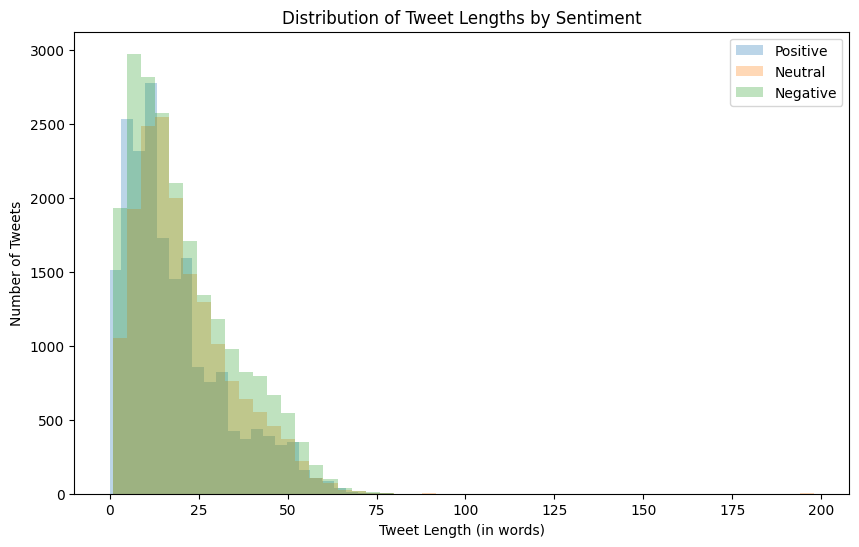

In [13]:

def show_relationship_between_tweet_length_and_sentiment() -> None:
    # Relationthip between tweet length and sentiment
    df["tweet_length"] = df["tweet"].apply(lambda x: len(x.split()))
    plt.figure(figsize=(10, 6))
    for sentiment in sentiment_categories:
        subset = df[df["sentiment"] == sentiment]
        plt.hist(subset["tweet_length"], bins=50, alpha=0.3, label=sentiment)
    plt.xlabel("Tweet Length (in words)")
    plt.ylabel("Number of Tweets")
    plt.title("Distribution of Tweet Lengths by Sentiment")
    plt.legend()
    plt.show() 

show_relationship_between_tweet_length_and_sentiment()

## 2.3 Insights

* There is no distinct visble relationship between the length of a tweet and it's sentiment. Negative tweets are slightly longer.
* The words "game" & "play" are in top 10 for Positive, Negative and Neutral tweets.
* Tweets cannot be classified based on just 1 or 2 words, we need to know the "Context" under which they are used.

# Part 3 - Building the RNN Model

## 3.1 Model Architecture

In [14]:
def build_rnn_model() -> keras.Model:
    model = keras.Sequential()
    model.add(keras.Input(shape=(GlobalConfig.TEXT_VECTOR_OUTPUT_SEQUENCE_LENGTH,)))
    
    model.add(
        keras.layers.Embedding(
            input_dim=GlobalConfig.TEXT_VECTOR_MAX_TOKENS, 
            output_dim=GlobalConfig.TEXT_VECTOR_EMBEDDING_DIMENSION
        )
    )    
    
    model.add(keras.layers.Bidirectional(
        keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2)
    ))

    model.add(keras.layers.Dense(32, activation="relu"))
    model.add(keras.layers.Dense(3, activation="softmax"))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

model = build_rnn_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 64)           320000    
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 390275 (1.49 MB)
Trainable params: 390275 (1.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3.2 Model Implementation

In [ ]:
def prepare_data_for_model(df: pd.DataFrame) -> pd.DataFrame:
    label_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}
    df["sentiment_label"] = df["sentiment"].map(label_mapping)
    return df
    
df = prepare_data_for_model(df)

def get_features_and_targets(df: pd.DataFrame) -> tuple[np.ndarray, np.ndarray]:
    X = np.array(list(df["sanitized_tweet_vector"].values))
    y = df["sentiment_label"].to_numpy(dtype=np.int32)
    return X, y

X, y = get_features_and_targets(df)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=GlobalConfig.RANDOM_SEED, stratify=y)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(
    X_train, 
    y_train, 
    validation_split=0.2, 
    epochs=1, 
    batch_size=64, 
    callbacks=[early_stopping, TqdmCallback(verbose=1)],
    verbose=0

)



  0%|          | 0/1 [00:00<?, ?epoch/s]

: 